<a href="https://colab.research.google.com/github/kavya-prabahar/MainFlow/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Mainflow /USvideos.csv"

In [4]:
dataset = pd.read_csv(path)

In [5]:
dataset.shape

(40949, 16)

In [7]:
dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.shape

(40901, 16)

In [10]:
dataset.drop(columns=["description","thumbnail_link","tags"], inplace=True)

In [11]:
dataset.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [12]:
dataset.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   views                   40901 non-null  int64 
 7   likes                   40901 non-null  int64 
 8   dislikes                40901 non-null  int64 
 9   comment_count           40901 non-null  int64 
 10  comments_disabled       40901 non-null  bool  
 11  ratings_disabled        40901 non-null  bool  
 12  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(5)
memory usage: 3.5+ MB


In [14]:
from datetime import datetime

In [15]:
dataset["trending_date"] = pd.to_datetime(dataset["trending_date"], format="%y.%d.%m")

In [16]:
dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False


In [17]:
dataset['publish_time'] = pd.to_datetime(dataset['publish_time'])

In [18]:
dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False


In [19]:
dataset["publish_month"] = dataset["publish_time"].dt.month
dataset["publish_day"] = dataset["publish_time"].dt.day
dataset["publish_hour"] = dataset["publish_time"].dt.hour
dataset["publish_year"] = dataset["publish_time"].dt.year

In [20]:
dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour,publish_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,748374,57527,2966,15954,False,False,False,11,13,17,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,2418783,97185,6146,12703,False,False,False,11,13,7,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146033,5339,8181,False,False,False,11,12,19,2017
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,343168,10172,666,2146,False,False,False,11,13,11,2017
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095731,132235,1989,17518,False,False,False,11,12,18,2017


In [21]:
yearly_count = dataset.groupby("publish_year")["video_id"].count()

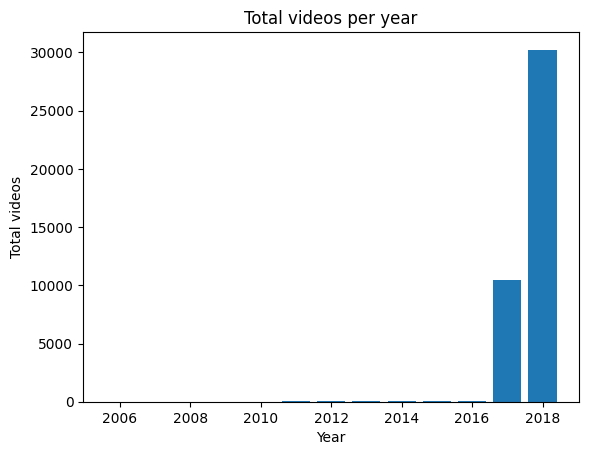

In [22]:
plt.bar(yearly_count.index, yearly_count.values)
plt.title("Total videos per year")
plt.xlabel("Year")
plt.ylabel("Total videos")
plt.show()

In [23]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

<ipython-input-24-8830934029cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category_id', data=dataset, order=dataset['category_id'].value_counts().index,palette="dark")


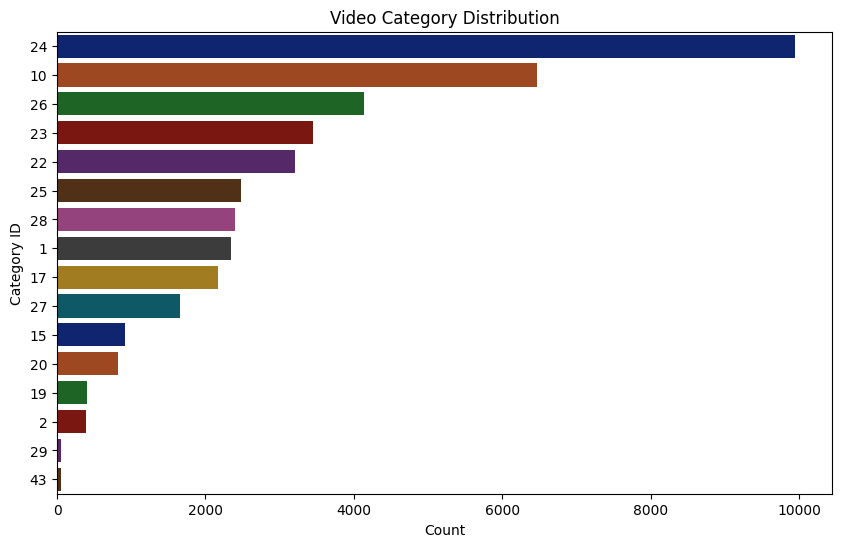

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category_id', data=dataset, order=dataset['category_id'].value_counts().index,palette="dark")
plt.title('Video Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category ID')
plt.show()


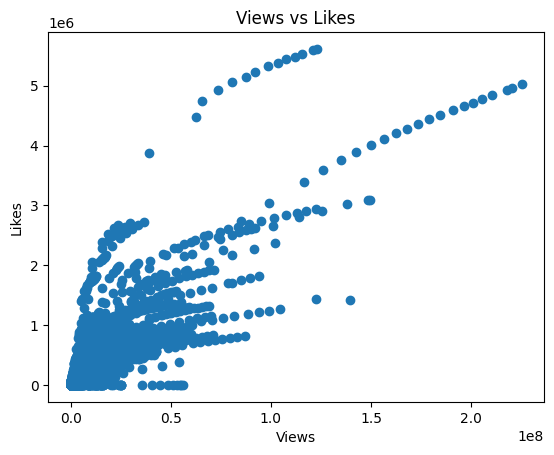

In [25]:
plt.scatter(dataset['views'], dataset['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs Likes')
plt.show()

In [26]:
hourly_count = dataset["publish_hour"].value_counts()

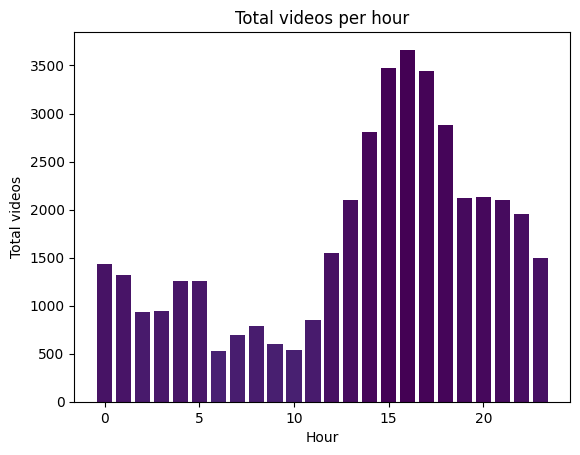

In [27]:
plt.bar(hourly_count.index, hourly_count.values,color=plt.cm.viridis.colors)
plt.title("Total videos per hour")
plt.xlabel("Hour")
plt.ylabel("Total videos")
plt.show()

<ipython-input-28-fb4a2cb72b51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels_likes.values, y=top_channels_likes.index, palette = "colorblind")


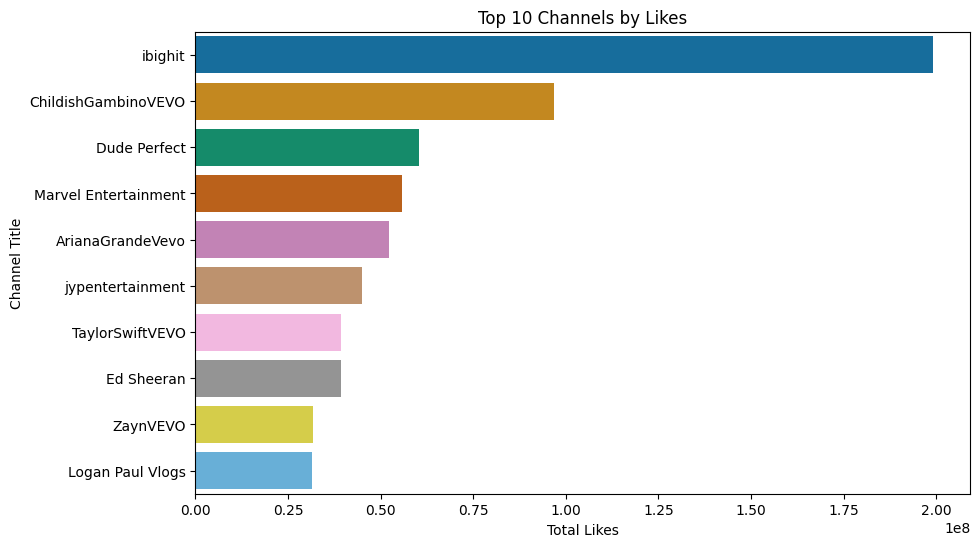

In [28]:
top_channels_likes = dataset.groupby('channel_title')['likes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels_likes.values, y=top_channels_likes.index, palette = "colorblind")
plt.title('Top 10 Channels by Likes')
plt.xlabel('Total Likes')
plt.ylabel('Channel Title')
plt.show()


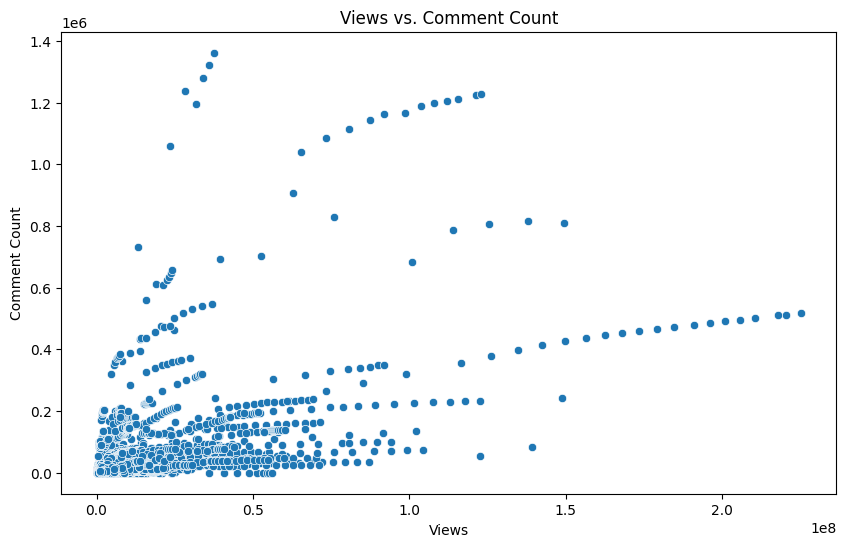

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='comment_count', data=dataset)
plt.title('Views vs. Comment Count')
plt.xlabel('Views')
plt.ylabel('Comment Count')
plt.show()


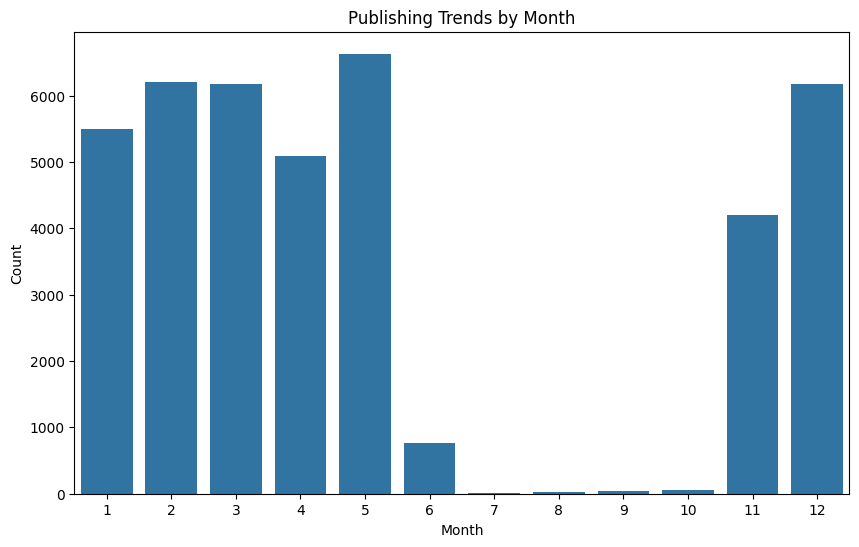

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='publish_month', data=dataset)
plt.title('Publishing Trends by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()